## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, an A/B test run by an e-commerce website will be conducted.  The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [7]:
user_sum = df.user_id.nunique()
user_sum

290584

d. The proportion of users converted.

In [8]:
# Divide the converted users number over the total number of users
converted_proportion = df.converted.sum() / user_sum
converted_proportion

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [4]:
# Formulate 2 dataframe according to the conditions needed
condition_1 = df[(df.landing_page == 'new_page') & (df.group != 'treatment')]
condition_2 = df[(df.landing_page != 'new_page') & (df.group == 'treatment')]
# Merge the 2 dataframes together
query_df = pd.concat([condition_1, condition_2])
# Check the number of unique users in this new dataframe
query_df.user_id.nunique()

3893

f. Do any of the rows have missing values?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [37]:
# Create the new dataframe as a copy from the original one
df2 = df.copy()

In [38]:
# Drop the rows that has no meaning to our analysis
index_query = query_df.index
df2.drop(index_query, inplace=True)

In [39]:
# Make sure everything looks good for the new df
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


cols_to_use = control_group.columns.difference(treat_group.columns)
df2 = pd.merge(treat_group, control_group[cols_to_use], left_index=True, right_index=True, how='outer')
df2.info()

In [40]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [10]:
df2[df2.user_id.duplicated() == True]
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [11]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [41]:
df2.drop(index=2893 , inplace=True)

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [13]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [43]:
convert_probability = df2.converted.sum() / df2.converted.count()
convert_probability

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [44]:
convert_control = df2[df2.group == 'control'].converted.sum() / df2[df2.group == 'control'].converted.count()
convert_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [45]:
convert_treatment = df2[df2.group == 'treatment'].converted.sum() / df2[df2.group == 'treatment'].converted.count()
convert_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [46]:
newpage_probability = df2[df2.landing_page == 'new_page'].converted.count() / df2.landing_page.count()
newpage_probability

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Results Interpretation:
- The probability of an individual converting regardless of the page they receive: 0.11959708724499628. This means that about 12% of our total number of users, the control (old page users) and treatment (new page users) groups both, converted successfully.
- The probability that an individual received the new page: 0.5000619442226688. This means that about 50% which is half of tour total number of users from both groups were shown the new page, thus considered the treatment group.

These results clearly lack any sufficient evidence to argue that the new treatment page leads to more conversions. If half of users were shown the new page and from both groups almost 12% converted, we must dig deeper to figure out whether this coversion probability is significant or not. This can be achieved through conducting an A/B Test to compare between the two groups of users and know with hypothesis testing which page is significantly better in terms of achieving higher conversions.



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- **$H{o}$**:  **$p_{new}$** ≤ **$p_{old}$**
- **$H{1}$**: **$p_{new}$** > **$p_{old}$**  

At a Type I error rate of 5% α = 0.05 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [47]:
# Firstly create 2 dataframes that extract each group alone to ease computations
control_df = df2[df2.group == 'control']
treat_df = df2[df2.group == 'treatment']

a. What is the **convert rate** for $p_{new}$ under the null? 

In [48]:
# Divide the converted users from treatment group by the overall converted users
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [49]:
# Divide the converted users from treatment group by the overall converted users
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [50]:
n_new = treat_df.user_id.nunique()
n_new

145310

d. What is $n_{old}$?

In [51]:
n_old = control_df.user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [52]:
new_page_converted = np.random.binomial(n_new,p_new)
new_page_converted

17398

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [53]:
old_page_converted = np.random.binomial(n_old,p_old)
old_page_converted

17535

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [54]:
new_page_converted/n_new - old_page_converted/n_old

-0.0009727156156576211

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [55]:
# Simulate the observed differences
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

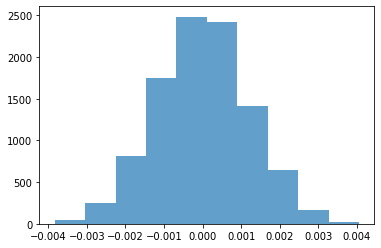

In [56]:
# Plot a histogram for the observed differences
plt.hist(p_diffs, alpha=0.7);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [57]:
# Transform the observed difference into a Numpy array
p_diffs = np.array(p_diffs)

# Calculate the actual difference
actual_diff = (treat_df.query('converted == 1').user_id.nunique() / treat_df.user_id.nunique())-(control_df.query('converted == 1').user_id.nunique() / control_df.user_id.nunique())
print(actual_diff)


# Calculate the P-value
(actual_diff < p_diffs).mean()

-0.0015782389853555567


0.9068

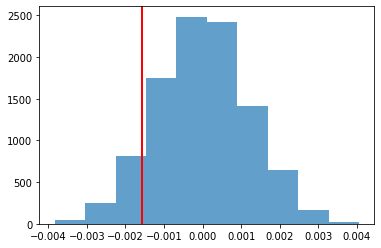

In [58]:
# Display the atual difference on the observed differences histogram
plt.hist(p_diffs, alpha=0.7);
plt.axvline(actual_diff, c='r', linewidth = 2);

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**

I computed the probability of obtaining the observed difference proportion if the null hypothesis is true. This value is called in statistics *P-value*. If this value happened to be equal or less than *alpha* (the I type error probability), then we reject the null hypothesis.

Meanwhile, when it's larger than *alpha* ***(*** which is our case here! Since ***P-value 0.9 > alpha 0.05)***, then we fail to reject the null hypothesis, meaning that there is no enough evidence to claim that the new page increased the conversion rate. In short, this difference between the coversion rates for the new page and the old page isn't statistically significant.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [59]:
import statsmodels.api as sm

convert_old = control_df.query('converted == 1').user_id.nunique()
convert_new = treat_df.query('converted == 1').user_id.nunique()
n_old = treat_df.user_id.nunique()
n_new = control_df.user_id.nunique()

# Display the calculated values
convert_old, convert_new, n_old, n_new

(17489, 17264, 145310, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [60]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

(1.2616957421858055, 0.2070582896065548)

In [61]:
# Compute the critical value at 95% confidence level
# Taking into consideration that this is a one-side test
from scipy.stats import norm
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- Z-score describes the position of a raw score in terms of its distance from the mean, measured in standard deviation units. So her in our case, A z-score of 1.26 is less than critical value 1.96 at 95% confidence level, meaning that it doesn't lie in the rejection area, so we fail to reject the null hypothesis which states that the old page converts equal or more users than the new page.

- P-value here ***0.21*** is different than the P-value under the null hypothesis ***0.91***, but still statistically insignificant.

These findings are consistent with what was computed in parts **j** and **k**.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression since our rvariable of interest (the response variable); `converted or not` is a categorical one, with only two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [64]:
# Create the intercept
df2['intercept'] = 1
# Create the dummy variable for our A/B (old/new) pages
df2[['ab_page', 'ab_page2']] = pd.get_dummies(df2['landing_page'])

In [67]:
# Drop the one of the created dummies to avoid correlation issues
df2.drop('ab_page2', axis=1, inplace=True)

In [68]:
# Make sure everything looks fine
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [73]:
# Fit the logistics regression model
ab_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = ab_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [74]:
# Display model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Apr 2021   Pseudo R-squ.:               8.077e-06
Time:                        14:40:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>

The P-value here is 0.19 which is different from what we found in part II because:
- The null and alternative hypthesis in part II performed to make a one-sided test as following:
    - **$H{o}$**:  **$p_{new}$** ≤ **$p_{old}$**
    - **$H{1}$**: **$p_{new}$** > **$p_{old}$** 
    

- While the null and alternative hypthesis in our logistic regression model performed is by default a two-tailed test as following:
    - **$H{o}$**:  **$p_{new}$** - **$p_{old}$** = 0
    - **$H{1}$**:  **$p_{new}$** - **$p_{old}$** ≠ 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It's a very good idea to consider other factors into our regression model for practicality reasons. In other words, it's a must to make sure our model isn't only statistically significant, but both *statistically and practically* significant. So we may consider factors such as *cost, time and effort* required to make the decision more efficiently.



There's a number of things to take care of when adding additional terms into a logistic regression model:
- Make sure the added variables aren't highly correlated with each other to avoid multicollinearity.
- Make sure the number of observations is larger than the number of variables to avoid overfitting.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns. Provide the statistical output as well as a written response to answer this question.

In [93]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [94]:
# Create the necessary dummy variables
df_new[['country_CA','country_UK','country_US']] = pd.get_dummies(df_new.country)

In [95]:
# Check the mean proportions for each country individually on conversion
df_new.query('country_US == 1').converted.mean(), df_new.query('country_UK == 1').converted.mean(), df_new.query('country_CA == 1').converted.mean()

(0.1195468006423762, 0.12059448568984076, 0.11531829781364232)

This shows that conversion rates are the highest for Canada ***0.1206*** the the UK ***0.1195*** and finally the US ***0.1153***, with a slight difference between Canada and the UK.

In [96]:
# Drop one of the new dummies to avoid correlation issues
df_new.drop('country_CA', axis=1, inplace=True)

In [97]:
# Make sure everything looks good
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,country_UK,country_US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [99]:
# Fit the logistic model and obtain the results
country_model = sm.Logit(df_new['converted'], df_new[['intercept', 'country_UK', 'country_US']])
results = country_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 06 Apr 2021   Pseudo R-squ.:               1.521e-05
Time:                        16:03:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

According to these results, the p-value for both countries yields a value larger than or alpha 0.05. Hence, there is no statistical evidence on the country feature significant impact on conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [100]:
# Fit the logistic model and obtain the results
country_model = sm.Logit(df_new['converted'], df_new[['intercept', 'country_UK', 'country_US', 'ab_page']])
results = country_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 06 Apr 2021   Pseudo R-squ.:               2.323e-05
Time:                        16:16:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

This output also shows that the p-value for countries and the new page related to the A/B test yields a value larger than or alpha 0.05. Hence, there is no statistical evidence on the country feature, nor the new page significant impacts on conversion rates.


<a id='conclusions'></a>
## Conclusions

This project aimed at conducting an A/B Test for an e-commerce website for a new webpage. After conducting the test and looking into the results, it's shown that this new page has no statistically significant impact on increasing the conversions for the website. So it's recommended to:
- Either do not implement this new webpage.
- Or conduct another test taking into consideration other factor like the duration because perhaps the test just needs to be run an additional period of time to observe significant results.
- Lastly, it's very crucial to check the practicality for the implementation for this new webpage, and make sure it's consistent with the company resources and goals.
